<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped_doc.svg?sanitize=true">
<font size="+3">Effective computation in Biomechanics</font>

<font size="+2">Romain Martinez</font> <a href="https://github.com/romainmartinez"><img src="https://img.shields.io/badge/github-romainmartinez-green?logo=github&style=social" /></a>

<!--NAVIGATION-->
< [Biomechanical analysis with Pyomeca](01.03-intro-to-pyomeca.ipynb) | [Contents](index.ipynb) | [Introduction to musculoskeletal modelling](02.00-musculoskeletal-modelling.ipynb) >

# Programming tips and tricks

## Tips 0: Use Google, a lot

Text(0.5, 1.0, 'Programming help')

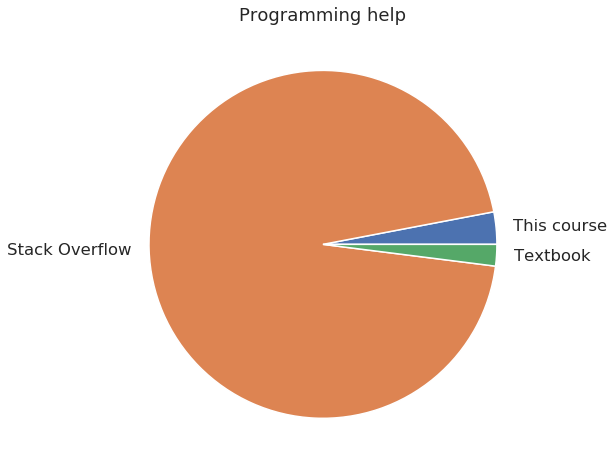

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext lab_black

sns.set(style="ticks", context="talk")

plt.figure(figsize=(8, 8))
plt.pie(x=[3, 95, 2], labels=["This course", "Stack Overflow", "Textbook"])
plt.title("Programming help")

## Tips 1: Use functions and break your code into reusable bits

Do not use the messy "spaghetti" code pattern:

<img style="width: 400px" src="./img/spaghetti.svg">

- Often a complicated mess
- Programs often work but are difficult to read and maintain
- Confusing and error prone

But rather the well structured "ravioli" pattern:

<img style="width: 700px" src="./img/bloc-code.svg">

- Little chunks of reusable functionality
- Clean interface

## Tips 2: Use Git & GitHub

Start by creating an account on [GitHub](https://github.com/join), Then create a test repo.


- 1 repo/project
- If you start using git, use [GitKraken](https://www.gitkraken.com/). Once you are more comfortable, use the terminal

<img src="./img/git-flow.png"></img>

- basic workflow:
1. create a branch
2. commit changes
3. submit pull request
4. discuss
5. merge & delete branch

- keep your project clear and organized:

<img style="float: right; width: 300px" src="./img/paper-code.png">

```bash
├── LICENSE
├── Makefile         # Makefile with commands like `make data` or `make figures`
├── README.md        # The top-level README for developers using this project.
├── data
│   ├── processed    # The final, canonical data sets for modeling.
│   └── raw          # The original, immutable data dump.
│
├── notebooks        # Jupyter notebooks.
│
├── reports          # Generated analysis as HTML, PDF, LaTeX, etc.
│   └── figures      # Generated graphics and figures to be used in reporting
│
├── environment.yml  # The requirements file for reproducing the analysis environment
│
├── setup.py         # Make this project pip installable with `pip install -e`
│
└── src              # Source code for use in this project.
    └── __init__.py  # Makes src a Python module
```

### Why using git?

- no more:
```
.
├── inverse_kinematics_1.py
├── inverse_kinematics_1_NEW.py
├── inverse_kinematics_1_NOT_WORKING.py
├── inverse_kinematics_1_old.py
├── inverse_kinematics_2.py
├── inverse_kinematics_2_v2.py
└── inverse_kinematics.py
```


- you have access to all your commit history

- you can try out new features or analysis, without risking breaking your code (as you can always go back)

- working in collaboration with others is greatly simplified

## Tips 3: Do not comment your code

> “Good code is self-documenting.”

With proper variable and function naming along with good code structure, there is no need to comment your code.

If you need to comment your code, there is something wrong about it.

## Tips 4: Do not use notebooks for everything

If you create a lot of functions and break your code into files, you will need a __debugger__.

IDEs like [Pycharm](https://www.jetbrains.com/pycharm/) or [VSCode](https://code.visualstudio.com/) are essential to be productive.

0. intelligent coding assistance

<img src="./img/pycharm-intelligent.gif"></img>

1. Debug a script (`shift` + `f9`)

<img src="./img/pycharm-debugger.gif"></img>

3. navigate in a project (`ctrl` + `left click`)

4. Autoformat code (`ctrl` + `alt` + `l`)

<img src="./img/pycharm-autoformat.gif"></img>

5. find (`ctrl` + `shift` + `f`) & replace (`ctrl` + `shift` + `r`) anywhere

6. quickly switch between files (`ctrl` + `E`)

## Tips 5: Learn pandas and _tidy_ your data

In [2]:
def parse_condition(filename):
    split = filename.split("_")
    return {
        "participant": split[0],
        "men": int(split[3].replace("sex", "")),
        "trial": int(split[4]),
    }

### Batch processing: the standard way



In [3]:
import pandas as pd
from pathlib import Path
import numpy as np

data_path = Path("..") / "data" / "emg"

data = []

for file in data_path.glob("*12kg*.csv"):
    participant_data = parse_condition(file.stem)
    participant_data["data"] = pd.read_csv(file).values
    data.append(participant_data)

It is painful to manipulate data:

In [4]:
## what is the average activation and std?
average_activation = np.mean([datum["data"].mean() for datum in data])
std_activation = np.mean([datum["data"].std() for datum in data])

average_activation, std_activation

(0.16987757439041135, 0.17978722071676356)

In [5]:
## what is the average activation by muscle and by sex?
men_data = np.array([datum["data"] for datum in data if datum["men"]])
women_data = np.array([datum["data"] for datum in data if not datum["men"]])

print(men_data.shape)

average_activation_men = men_data.mean(axis=0).mean(axis=0)
std_activation_men = men_data.std(axis=0).std(axis=0)

average_activation_women = women_data.mean(axis=0).mean(axis=0)
std_activation_women = women_data.std(axis=0).std(axis=0)

print("men:")
print(f"\t{average_activation_men, std_activation_men}")

print("women:")
print(f"\t{average_activation_women, std_activation_women}")

(162, 100, 4)
men:
	(array([0.16978336, 0.13687674, 0.05866497, 0.13269824]), array([0.06898431, 0.0621106 , 0.05098515, 0.04274449]))
women:
	(array([0.23464016, 0.17574844, 0.0851742 , 0.29283968]), array([0.07309967, 0.05686183, 0.04210597, 0.01803945]))


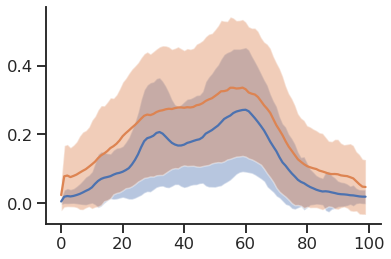

In [6]:
## plot a line plot with mean +/- std by sex
time_average_men = men_data.mean(axis=-1).mean(axis=0)
time_std_men = men_data.std(axis=0).mean(axis=1)

time_average_women = women_data.mean(axis=-1).mean(axis=0)
time_std_women = women_data.std(axis=0).mean(axis=1)

frames = np.arange(time_average_men.shape[0])

plt.plot(time_average_men, label="men")
plt.fill_between(
    frames, time_average_men - time_std_men, time_average_men + time_std_men, alpha=0.4
)
plt.plot(time_average_women, label="women")
plt.fill_between(
    frames,
    time_average_women - time_std_women,
    time_average_women + time_std_women,
    alpha=0.4,
)
sns.despine()

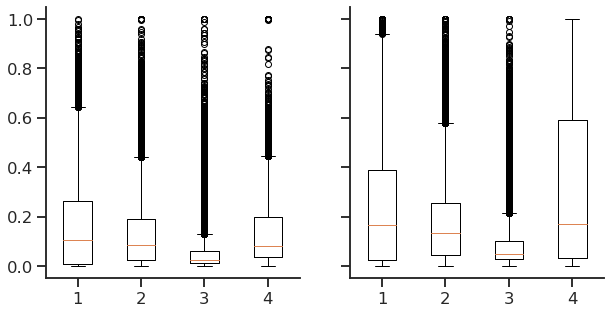

In [7]:
## plot a boxplot of the average activation by muscle and sex
men_boxplot_data = men_data.reshape(-1, 4)
women_boxplot_data = women_data.reshape(-1, 4)

f, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

ax[0].boxplot(men_boxplot_data)
ax[1].boxplot(women_boxplot_data)

sns.despine()

### Batch processing: the pandas way

Most tasks are easier with tidy data (aggregation, plotting, statistics, ...)

<img src="./img/tidy.svg"></img>

In [8]:
emg = pd.concat(
    [
        pd.read_csv(file).assign(**parse_condition(file.stem)).reset_index()
        for file in data_path.glob("*12kg*.csv")
    ]
).melt(
    id_vars=["participant", "men", "trial", "index"],
    value_name="emg",
    var_name="muscle",
)
emg.head()

,participant,men,trial,index,muscle,emg
0,alef,0,2,0,deltant,0.008289
1,alef,0,2,1,deltant,0.017571
2,alef,0,2,2,deltant,0.021931
3,alef,0,2,3,deltant,0.017753
4,alef,0,2,4,deltant,0.011484


In [9]:
emg.groupby(["men"])["emg"].agg(["mean", "std"])

,mean,std
men,,
0,0.197101,0.219823
1,0.124506,0.153920


In [10]:
emg.groupby(["men", "muscle"])["emg"].agg(["mean", "std"])

mean       std
men muscle                      
0   deltant   0.234640  0.232146
    deltmed   0.175748  0.166668
    deltpost  0.085174  0.105463
    ssp       0.292840  0.277385
1   deltant   0.169783  0.191040
    deltmed   0.136877  0.154095
    deltpost  0.058665  0.098057
    ssp       0.132698  0.135305

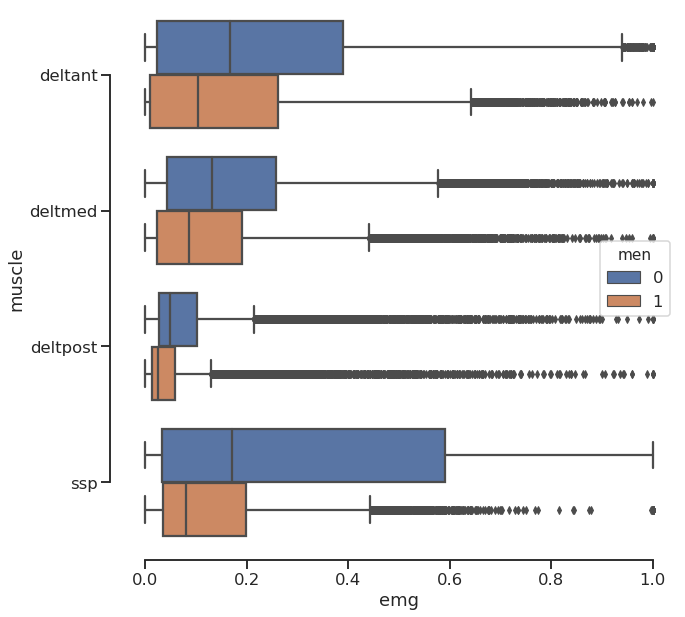

In [11]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=emg, x="emg", y="muscle", hue="men")
sns.despine(offset=10, trim=True)

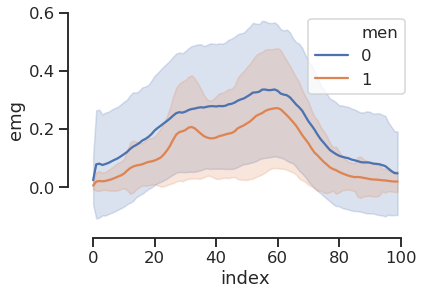

In [12]:
sns.lineplot(data=emg, x="index", y="emg", hue="men", ci="sd")
sns.despine(offset=10, trim=True)

## Tips 6: Effective data visualization

### Matplotlib

[Matplotlib](https://matplotlib.org/) is the basic, yet the most complete python plotting library.

It provides a plotting system similar to that of _MATLAB_, where everything is customizable.

Matplotlib has built up something of a bad reputation for being verbose. I think that complaint is valid, but misplaced. Matplotlib lets you control essentially anything on the figure.

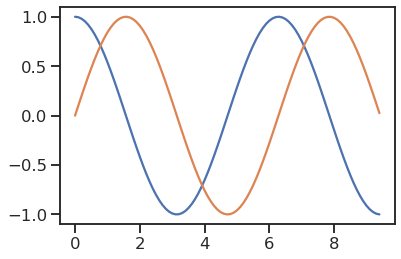

In [13]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_cos)
plt.plot(x, y_sin)
plt.show()

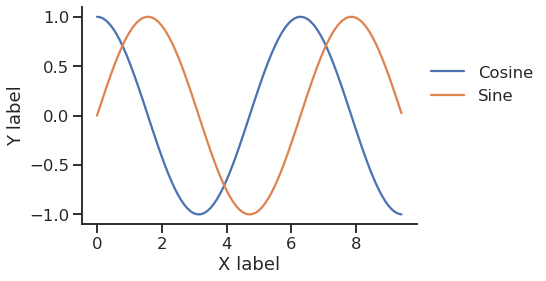

In [14]:
# a better plot
plt.plot(x, y_cos, label="Cosine")
plt.plot(x, y_sin, label="Sine")

plt.xlabel("X label")
plt.ylabel("Y label")
plt.legend(bbox_to_anchor=(1, 0.8), frameon=False)

sns.despine()

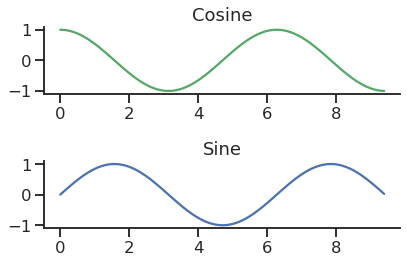

In [15]:
# subplots
_, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, y_cos, "g-")
ax[0].set_title("Cosine")

ax[1].plot(x, y_sin, "b-")
ax[1].set_title("Sine")

plt.tight_layout()
sns.despine()

#### Examples gallery

The [examples gallery](https://matplotlib.org/gallery/index.html) is a good place to see what can be done with Matplotlib.

### Other libraries

In real life (publication figures), I prefer two other libraries:

- [Seaborn](http://seaborn.pydata.org/): provides a high-level interface for drawing attractive statistical graphics. It gives a great API for quickly exploring 
different visual representations of your data.
  - [Examples gallery](https://seaborn.pydata.org/examples/wide_data_lineplot.html)
- [Altair](https://github.com/altair-viz/altair): like seaborn, but interactive and less verbose. my personal choice.
  - [Examples gallery](https://altair-viz.github.io/gallery/index.html)

### Data visualisation checklist

1. Start with a question in mind

2. Choose metrics that matter
  - not too many
  - variable that can resonate with your audience

3. Use the right chart type
  - examples in [data-to-viz](https://www.data-to-viz.com/)
  - no 3D-charts, pie chart or radar chart

4. Write with the good fonts
  - not to small
  - **bold** or _italic_, not both
  - avoid ALL CAPS
  - no angles
  - keep it simple

5. Highlight with the right colour
  - the less the better (less than 7)
  - same variable, same colour

6. Look for your data-ink ratio
   - [example](https://speakerdeck.com/cherdarchuk/remove-to-improve-the-data-ink-ratio)

<!--NAVIGATION-->
< [Biomechanical analysis with Pyomeca](01.03-intro-to-pyomeca.ipynb) | [Contents](index.ipynb) | [Introduction to musculoskeletal modelling](02.00-musculoskeletal-modelling.ipynb) >